In [1]:
import chess
import chess.pgn
import matplotlib.pyplot as plt
import pandas as pd


In [2]:

def parse_pgn(file_path):
    games = []

    with open(file_path) as f:
        while True:
            game = chess.pgn.read_game(f)
            if game is None:
                break

            game_info = {
                "Event": game.headers.get("Event", ""),
                "Site": game.headers.get("Site", ""),
                "Date": game.headers.get("Date", ""),
                "White": game.headers.get("White", ""),
                "Black": game.headers.get("Black", ""),
                "WhiteElo": game.headers.get("WhiteElo", ""),
                "BlackElo": game.headers.get("BlackElo", ""),
                "Opening": game.headers.get("ECO", ""),
                "Result": game.headers.get("Result", ""),
                "Termination":game.headers.get("Termination",""),
                "Moves": [str(move) for move in game.mainline_moves()],
            }

            games.append(game_info)

    return pd.DataFrame(games)


df_black_Rapid = parse_pgn(r'PGN Files\omarsayeh-black-Rapid.pgn')
df_white_Rapid = parse_pgn(r'PGN Files\omarsayeh-White-Rapid.pgn')
df_Black_Blitz = parse_pgn(r'PGN Files\omarsayeh-black-Blitz.pgn')
df_white_Blitz = parse_pgn(r'PGN Files\omarsayeh-white-Blitz.pgn')

In [3]:
df_black_Rapid.head(5)

,Event,Site,Date,White,Black,WhiteElo,BlackElo,Opening,Result,Termination,Moves
0,Live Chess,Chess.com,2023.12.03,ocarlosdepaula,omarsayeh,1091,1026,A00,1-0,ocarlosdepaula won by checkmate,"[e2e3, c7c6, d2d4, d7d5, b2b3, g8f6, c1b2, c8f..."
1,Live Chess,Chess.com,2023.12.06,rekip,omarsayeh,1020,1016,B12,1-0,rekip won by checkmate,"[e2e4, c7c6, d2d4, d7d5, e4e5, c8f5, c2c3, e7e..."
2,Live Chess,Chess.com,2023.12.06,Phyrgial,omarsayeh,1019,1006,B10,1-0,Phyrgial won by checkmate,"[e2e4, c7c6, b1c3, d7d5, e4d5, c6d5, d2d4, c8f..."
3,Live Chess,Chess.com,2023.12.15,sahil0611,omarsayeh,1051,992,A00,1-0,sahil0611 won - game abandoned,"[a2a4, g8f6, f2f3, g7g6, g2g4, f8g7, c2c3, d7d..."
4,Live Chess,Chess.com,2023.12.30,00-hosny-00,omarsayeh,972,1002,B10,0-1,omarsayeh won by resignation,"[e2e4, c7c6, g1f3, d7d5, f1d3, g7g6, e1g1, f7f..."


In [4]:
df_black_Rapid['Date'] = pd.to_datetime(df_black_Rapid['Date'], errors='coerce').dt.strftime('%Y-%m-%d')
df_white_Rapid['Date'] = pd.to_datetime(df_white_Rapid['Date'], errors='coerce').dt.strftime('%Y-%m-%d')
df_Black_Blitz['Date'] = pd.to_datetime(df_black_Rapid['Date'], errors='coerce').dt.strftime('%Y-%m-%d')
df_white_Blitz['Date'] = pd.to_datetime(df_white_Rapid['Date'], errors='coerce').dt.strftime('%Y-%m-%d')

In [5]:
Rapid_df = pd.concat([df_black_Rapid, df_white_Rapid]).sort_values(by='Date').reset_index(drop=True)

In [6]:
Blitz_df = pd.concat([df_white_Blitz, df_Black_Blitz]).sort_values(by='Date').reset_index(drop=True)

In [7]:
Rapid_df=Rapid_df.rename(columns={'Opening':'Opening Code'})
Blitz_df=Blitz_df.rename(columns={'Opening':'Opening Code'})

In [8]:
Rapid_df['Outcome'] = Rapid_df.apply(lambda row: 'Won as White' if row['White'] == 'omarsayeh' and row['Result'] == '1-0' 
                                        else 'Lost as White' if row['White'] == 'omarsayeh' and row['Result'] == '0-1'
                                        else 'Lost as Black' if row ['Black']=='omarsayeh'and row['Result'] == '1-0'
                                        else 'Won as Black' if row['Black'] == 'omarsayeh' and row['Result'] == '0-1'
                                        else 'Draw as Black' if row['Black'] == 'omarsayeh' and row['Result'] == '1/2-1/2'
                                        else 'Draw as White'
                                        , axis=1)

In [9]:
Blitz_df['Outcome'] = Blitz_df.apply(lambda row: 'Won as White' if row['White'] == 'omarsayeh' and row['Result'] == '1-0' 
                                        else 'Lost as White' if row['White'] == 'omarsayeh' and row['Result'] == '0-1'
                                        else 'Lost as Black' if row ['Black']=='omarsayeh'and row['Result'] == '1-0'
                                        else 'Won as Black' if row['Black'] == 'omarsayeh' and row['Result'] == '0-1'
                                        else 'Draw as Black' if row['Black'] == 'omarsayeh' and row['Result'] == '1/2-1/2'
                                        else 'Draw as White'
                                        , axis=1)

In [10]:
Blitz_df.sample(5)

,Event,Site,Date,White,Black,WhiteElo,BlackElo,Opening Code,Result,Termination,Moves,Outcome
181,Live Chess,Chess.com,2023-06-21,santos9876,omarsayeh,700,713,A40,0-1,omarsayeh won by checkmate,"[d2d4, c7c6, d4d5, c6d5, d1d5, g8f6, d5b3, g7g...",Won as Black
7,Live Chess,Chess.com,2022-12-19,omarsayeh,mgvasconcelos,488,317,D31,1-0,omarsayeh won by resignation,"[d2d4, d7d5, c2c4, c7c6, g1f3, e7e6, b1c3, f7f...",Won as White
29,Live Chess,Chess.com,2023-02-12,TeterTotAlt,omarsayeh,573,540,B12,1-0,TeterTotAlt won by resignation,"[e2e4, c7c6, d2d4, d7d5, g1f3, f7f5, e4d5, c6d...",Lost as Black
166,Live Chess,Chess.com,2023-04-10,omarsayeh,Budhachettri,700,737,A40,0-1,Budhachettri won by checkmate,"[d2d4, e7e6, c1f4, c7c5, e2e3, c5d4, e3d4, d8b...",Lost as White
52,Live Chess,Chess.com,2023-02-23,omarsayeh,PleadKO,570,572,A40,0-1,PleadKO won by resignation,"[d2d4, e7e6, g1f3, g8f6, b1c3, d7d5, c1f4, f6e...",Lost as White


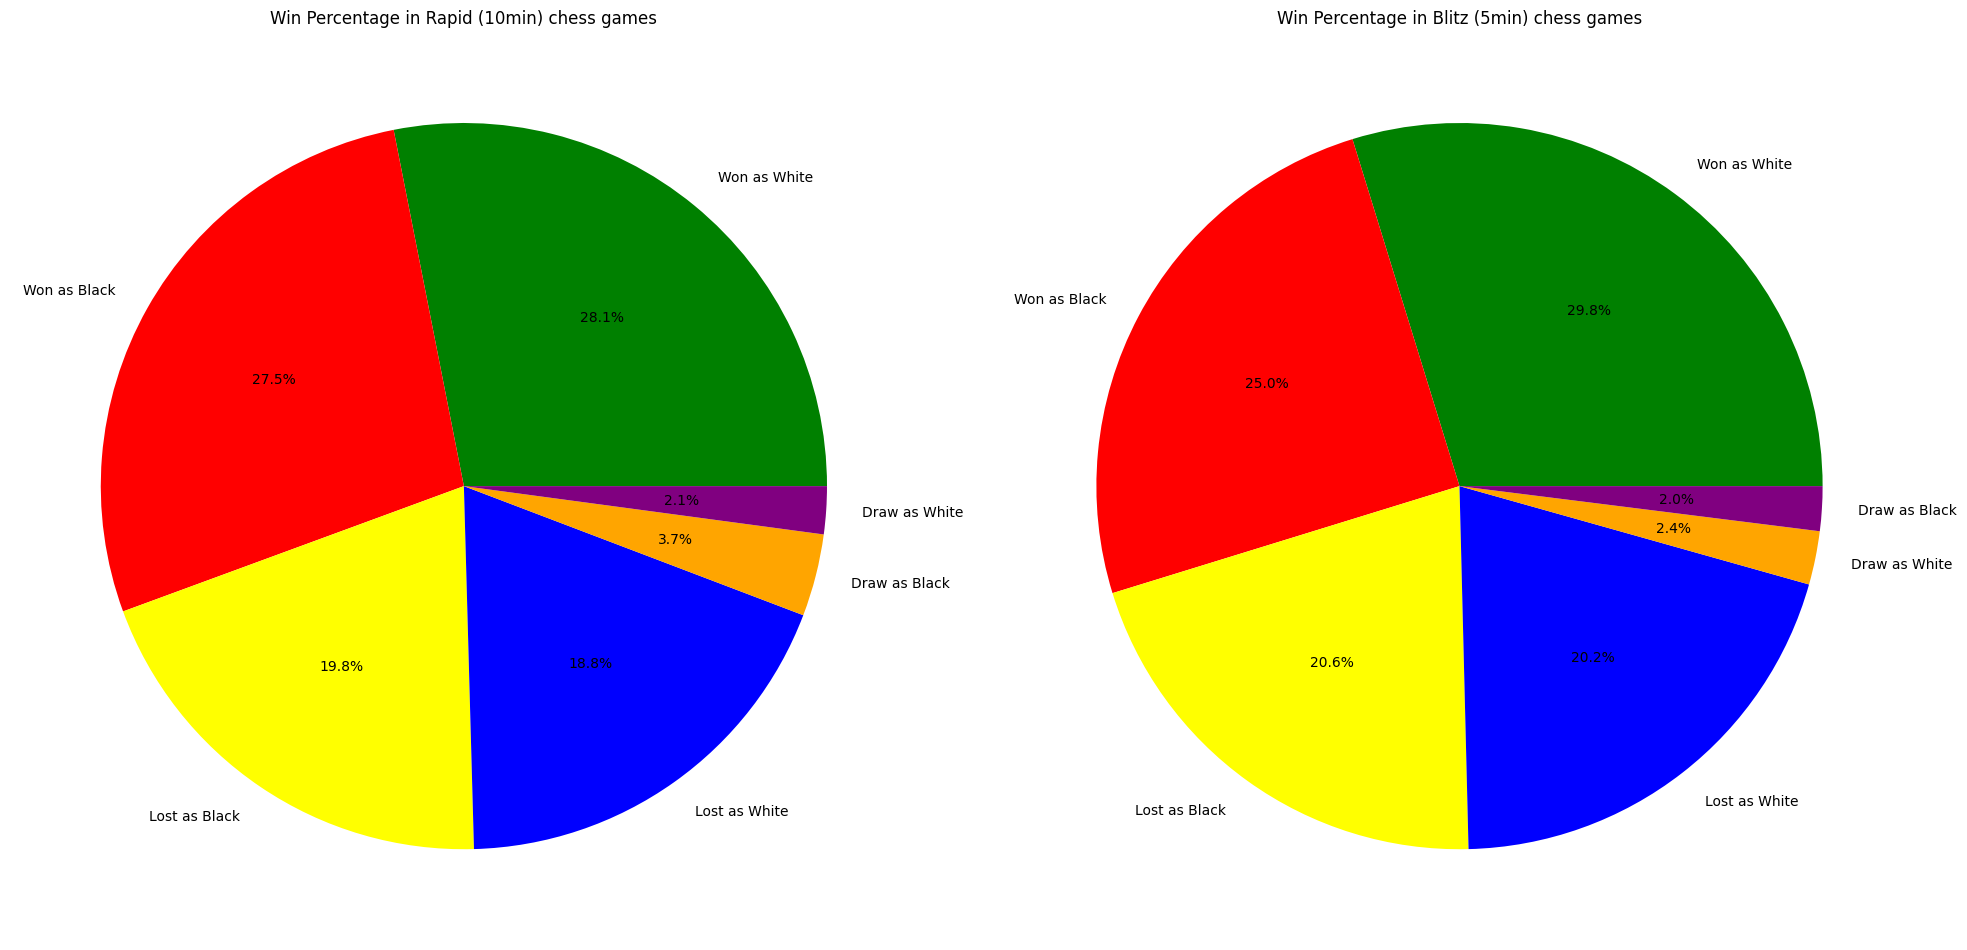

In [11]:
# Calculate win percentage
win_percentageRapid = Rapid_df['Outcome'].value_counts(normalize=True) * 100
win_percentageBlitz = Blitz_df['Outcome'].value_counts(normalize=True) * 100

plt.figure(figsize=(20,20))
# Plotting as a Rapid pie chart
plt.subplot(1, 2, 1)
plt.pie(win_percentageRapid, labels=win_percentageRapid.index, autopct='%1.1f%%',colors=['green', 'red', 'yellow','blue','orange','purple'])
plt.title('Win Percentage in Rapid (10min) chess games')



# Plotting as a Blitz pie chart
plt.subplot(1, 2, 2)
plt.pie(win_percentageBlitz, labels=win_percentageBlitz.index, autopct='%1.1f%%',colors=['green', 'red', 'yellow','blue','orange','purple'])
plt.title('Win Percentage in Blitz (5min) chess games')

# Adjust layout for better spacing
plt.tight_layout()

# Display the pie charts
plt.show()

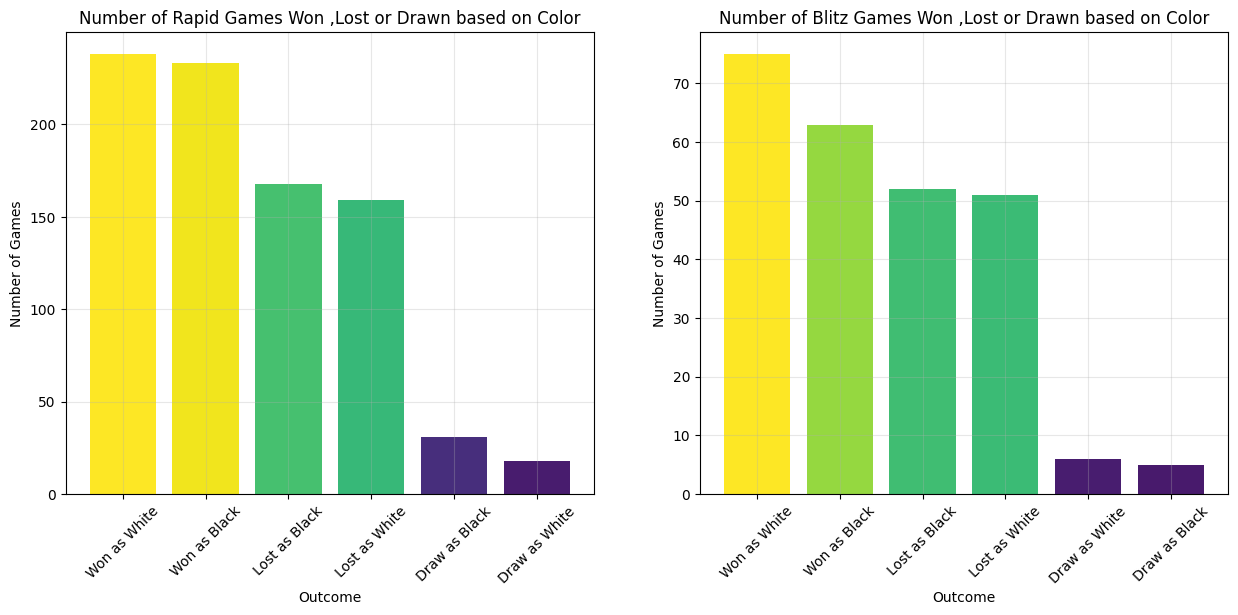

In [12]:
# Count the number of games won and lost
outcome_counts_Rapid = Rapid_df['Outcome'].value_counts()
outcome_counts_Blitz = Blitz_df['Outcome'].value_counts()


# Plotting as a bar chart (Rapid)
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.bar(outcome_counts_Rapid.index, outcome_counts_Rapid.values, color=plt.cm.viridis(outcome_counts_Rapid / outcome_counts_Rapid.max()))
plt.title('Number of Rapid Games Won ,Lost or Drawn based on Color')
plt.xlabel('Outcome')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(True,alpha=0.3)

# Plotting as a bar chart (Blitz)
plt.subplot(1, 2, 2)
plt.bar(outcome_counts_Blitz.index, outcome_counts_Blitz.values, color=plt.cm.viridis(outcome_counts_Blitz / outcome_counts_Blitz.max()))
plt.title('Number of Blitz Games Won ,Lost or Drawn based on Color')
plt.xlabel('Outcome')
plt.ylabel('Number of Games')
plt.grid(True,alpha=0.3)
plt.xticks(rotation=45)

plt.show()

In [13]:
Rapid_df['Date'] = pd.to_datetime(Rapid_df['Date'])
Blitz_df['Date'] = pd.to_datetime(Blitz_df['Date'])

In [14]:
# Convert Elo columns to numeric
Rapid_df['WhiteElo'] = pd.to_numeric(Rapid_df['WhiteElo'], errors='coerce')
Rapid_df['BlackElo'] = pd.to_numeric(Rapid_df['BlackElo'], errors='coerce')
Blitz_df['WhiteElo'] = pd.to_numeric(Blitz_df['WhiteElo'], errors='coerce')
Blitz_df['BlackElo'] = pd.to_numeric(Blitz_df['BlackElo'], errors='coerce')


In [15]:
# Filter based on player name and calculate the average Elo rating
if (Rapid_df['White'] == 'omarsayeh').any():
    monthly_elo_Rapid = Rapid_df[Rapid_df['White'] == 'omarsayeh'].groupby(Rapid_df['Date'].dt.to_period("M"))['WhiteElo'].mean()
elif (Rapid_df['Black'] == 'omarsayeh').any():
    monthly_elo_Rapid = Rapid_df[Rapid_df['Black'] == 'omarsayeh'].groupby(Rapid_df['Date'].dt.to_period("M"))['BlackElo'].mean()



In [16]:
# Filter based on player name and calculate the average Elo rating
if (Blitz_df['White'] == 'omarsayeh').any():
    monthly_elo_blitz = Blitz_df[Blitz_df['White'] == 'omarsayeh'].groupby(Blitz_df['Date'].dt.to_period("M"))['WhiteElo'].mean()
elif (Blitz_df['Black'] == 'omarsayeh').any():
    monthly_elo_blitz = Blitz_df[Blitz_df['Black'] == 'omarsayeh'].groupby(Blitz_df['Date'].dt.to_period("M"))['BlackElo'].mean()


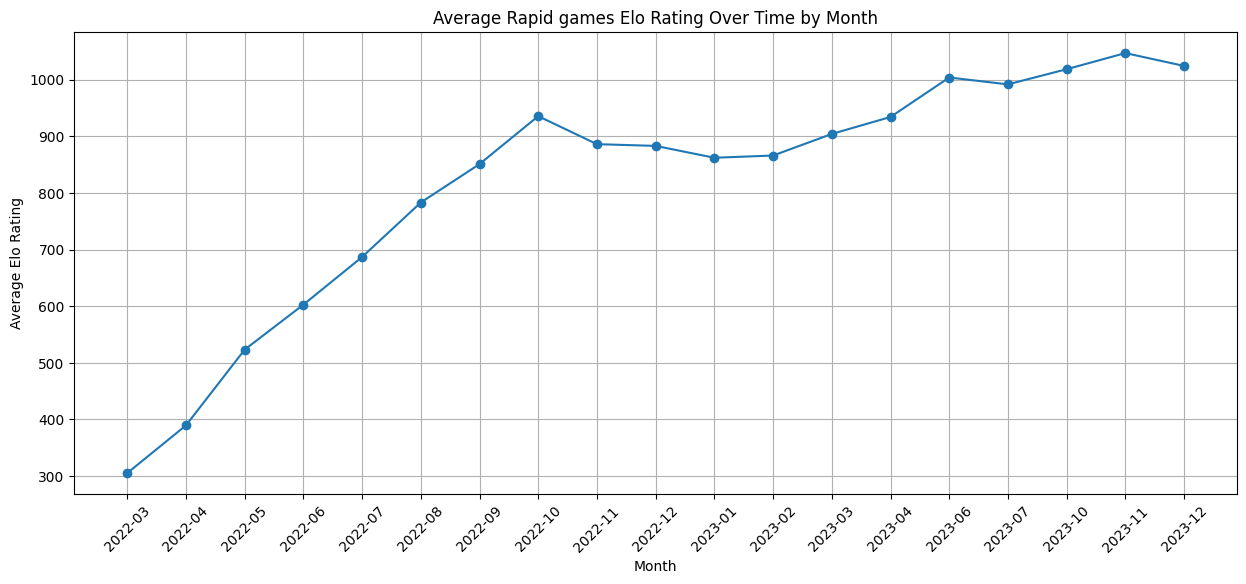

In [17]:

# Plotting as a line chart
plt.figure(figsize=(15, 6))
plt.plot(monthly_elo_Rapid.index.astype(str), monthly_elo_Rapid.values, marker='o')  # Convert the PeriodIndex to strings
plt.title('Average Rapid games Elo Rating Over Time by Month')
plt.xlabel('Month')
plt.ylabel('Average Elo Rating')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

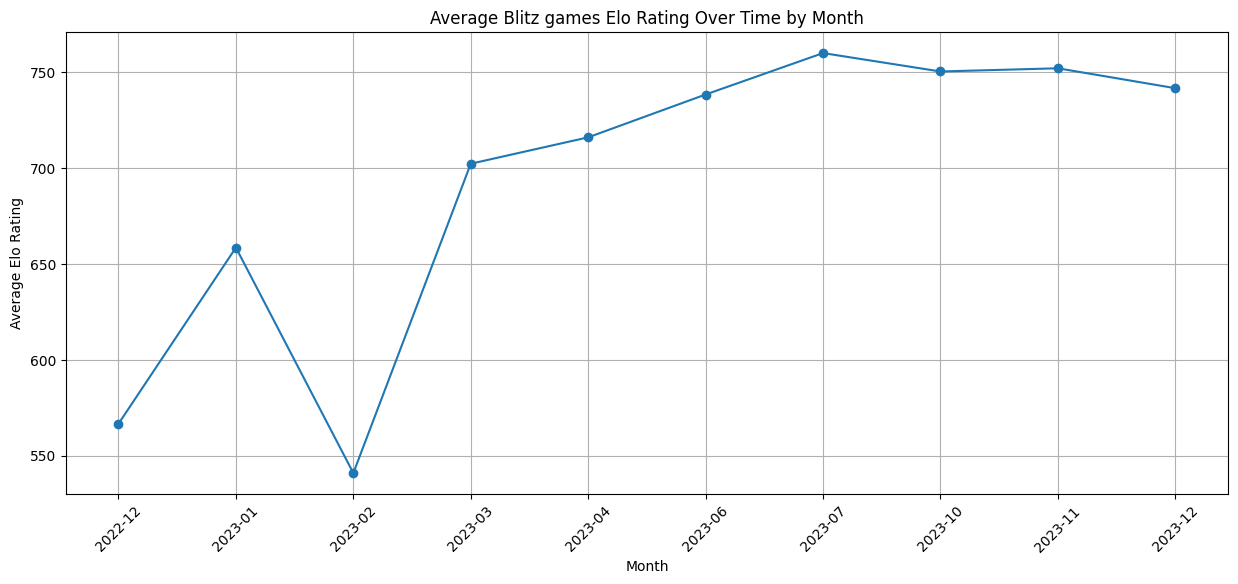

In [18]:
# Plotting as a line chart
plt.figure(figsize=(15, 6))
plt.plot(monthly_elo_blitz.index.astype(str), monthly_elo_blitz.values, marker='o')  # Convert the PeriodIndex to strings
plt.title('Average Blitz games Elo Rating Over Time by Month')
plt.xlabel('Month')
plt.ylabel('Average Elo Rating')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [19]:
#%run chess Python/ECO_parser.py
#Rapid_df['Opening'] = Rapid_df['Opening Code'].apply(lambda code: scrape_eco(f"https://www.365chess.com/eco/{code}"))
#Blitz_df['Opening'] = Blitz_df['Opening Code'].apply(lambda code: scrape_eco(f"https://www.365chess.com/eco/{code}"))


In [20]:
#%run chess Python/ECO_parser.py
#Rapid_df['Opening'] =Rapid_df['Opening'].apply(extractOpening)

In [21]:
Rapid_df=pd.read_csv(r'CSV files\Rapid_Games.csv')
Blitz_df=pd.read_csv(r'CSV files\Blitz_Games.csv')


In [22]:
Rapid_df['Opening'] = Rapid_df['Opening'].str.split(":").str[1].str.strip()
Blitz_df['Opening'] = Blitz_df['Opening'].str.split(":").str[1].str.strip()

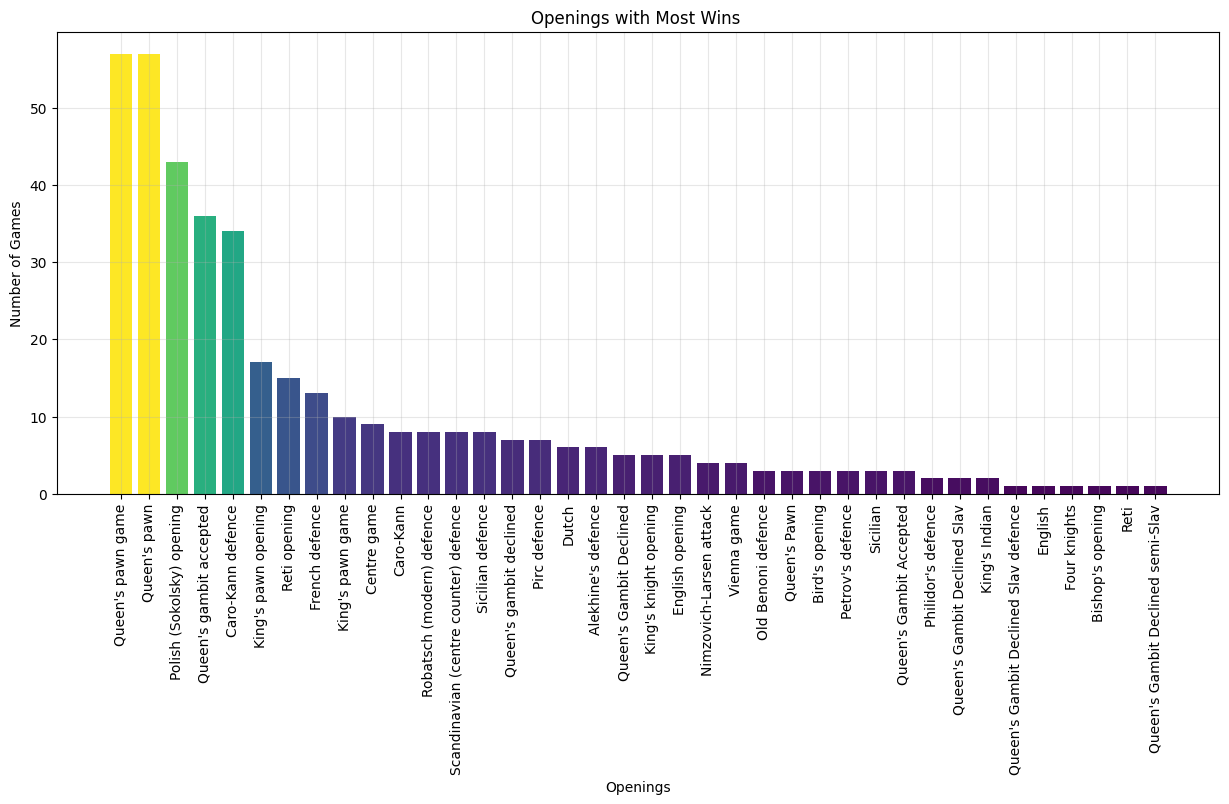

In [24]:
# Filter the DataFrame based on 'omarsayeh won'

wins_df = Rapid_df[Rapid_df['Termination'].str.contains('omarsayeh won')]


# Count the number of games won for each opening
opening_wins = wins_df['Opening'].value_counts()

# Plotting as a bar chart (Openings with most wins)
plt.figure(figsize=(15, 6))

plt.bar(opening_wins.index, opening_wins.values, color=plt.cm.viridis(opening_wins / opening_wins.max()))
plt.title('Openings with Most Wins ')
plt.xlabel('Openings')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)

plt.show()


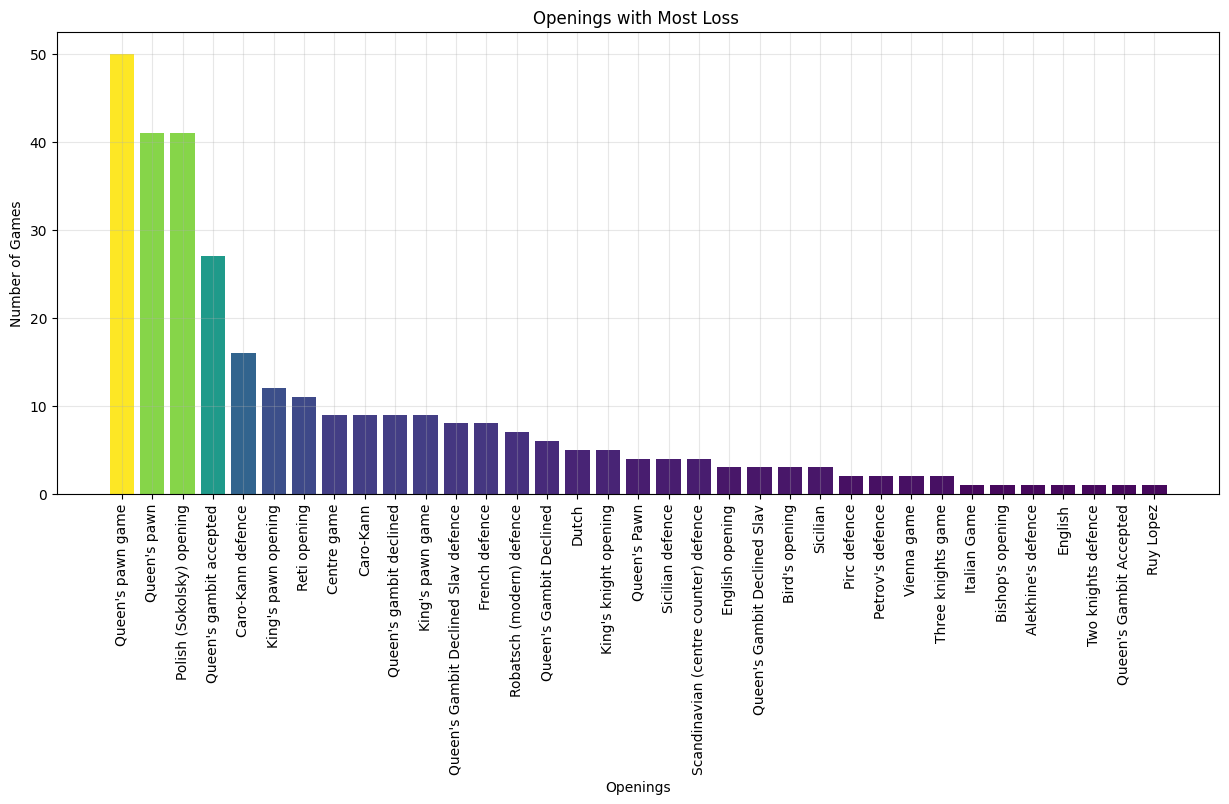

In [25]:
# Filter the DataFrame based on 'omarsayeh won'

Loss_df = Rapid_df[~Rapid_df['Termination'].str.contains('omarsayeh won')]


# Count the number of games won for each opening
opening_loss = Loss_df['Opening'].value_counts()

# Plotting as a bar chart (Openings with most wins)
plt.figure(figsize=(15, 6))

plt.bar(opening_loss.index, opening_loss.values, color=plt.cm.viridis(opening_loss / opening_loss.max()))
plt.title('Openings with Most Loss ')
plt.xlabel('Openings')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)

plt.show()